# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.

  Sumber = https://www.kaggle.com/datasets/adityakadiwal/water-potability

**Tentang Dataset Ini**

**Latar Belakang**

Air minum yang aman itu hak semua orang dan penting banget buat kesehatan. Nggak cuma itu, penyediaan air bersih juga jadi bagian kebijakan dasar buat melindungi masyarakat. Ini adalah isu penting baik buat kesehatan maupun pembangunan, dari tingkat nasional sampai lokal. Bahkan, di beberapa daerah, investasi untuk air bersih dan sanitasi terbukti menguntungkan secara ekonomi karena bisa menekan biaya pengobatan dan masalah kesehatan lainnya.

**Deskripsi Fitur**


1.  **pH:** Ini nunjukkin tingkat asam-basa air. Standar WHO buat air minum itu antara 6,5 sampai 8,5. Nilai dalam dataset ini umumnya masuk di rentang itu.
2.  **Hardness** Utamanya disebabkan oleh mineral kalsium dan magnesium dari batuan yang dilalui air. Makin lama kontak, makin tinggi kesadahannya. Kesadahan bikin air susah ngasih busa kalau pake sabun.
3.  **(TDS):** Ini jumlah mineral (seperti garam, kalsium, dll.) yang larut dalam air. TDS tinggi bikin air terasa aneh dan keliatan keruh. Batas ideal air minum itu di bawah 500 mg/l, maksimal 1000 mg/l.
4.  **Chloramines:** Disinfektan umum buat air minum, terbentuk dari campuran klorin dan amonia. Aman kalau kadarnya nggak lebih dari 4 mg/L.
5.  **Sulfate:** Zat alami dari tanah dan batuan. Di air tawar biasanya rendah (3-30 mg/L), tapi bisa sangat tinggi di daerah tertentu.
6.  **KConductivity:** Kemampuan air menghantarkan listrik, yang makin tinggi kalau kandungan mineralnya banyak. Menurut WHO, sebaiknya nggak lebih dari 400 μS/cm buat air minum.
7.  **Organic_carbon:** Mengukur bahan organik di air. Untuk air minum olahan, sebaiknya kurang dari 2 mg/L.
8.  **Trihalomethanes:** Zat kimia yang bisa terbentuk saat proses klorinasi. Batas amannya sampai 80 ppm.
9.  **Turbidity:** Nunjukkin seberapa keruh air karena ada partikel tersuspensi. Makin jernih, makin baik. Standar WHO di bawah 5 NTU.


**Target**

Potability : Angka 1 artinya airnya Layak Minum, sedangkan angka 0 artinya Tidak Layak Minum.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [43]:
# Memuat dataset dalam bentuk tabular
df = pd.read_csv('water_potability.csv')

# Menampilkan lima baris pertama dataset
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [44]:
# Meninjau jumlah baris kolom dan jenis data pada dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [45]:
# Menampilkan statistik deskriptif dataset
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [46]:
# Cek nilai yang hilang
df.isna().sum()
print(f'Count of Missing Values per Feature : \n{df.isnull().sum()} ')

Count of Missing Values per Feature : 
ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64 


In [47]:
# Cek duplikat
df.duplicated().sum()

np.int64(0)

In [48]:
df['Potability'].value_counts()


,count
Potability,
0,1998
1,1278


/tmp/ipython-input-3102607396.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Potability', data=df, palette='Pastel1')


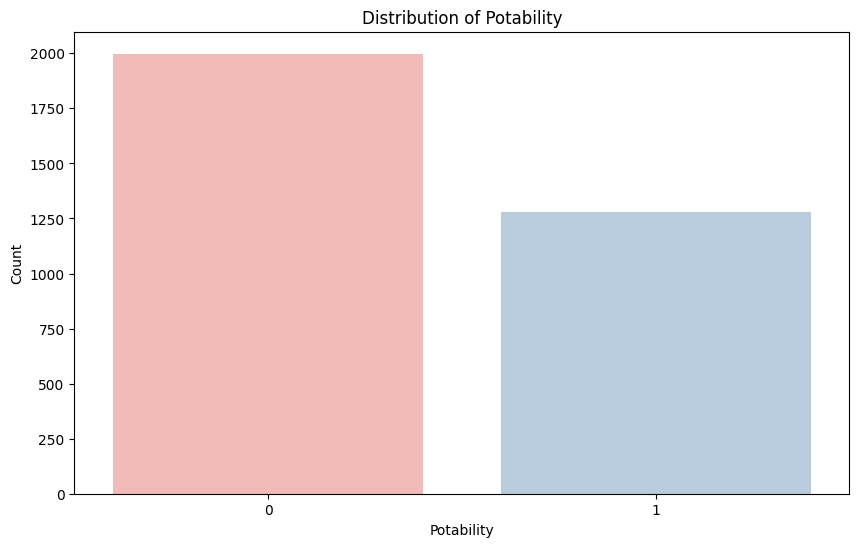

In [49]:
# Menampilkan distribusi target
plt.figure(figsize=(10, 6))
sns.countplot(x='Potability', data=df, palette='Pastel1')
plt.title('Distribution of Potability')
plt.xlabel('Potability')
plt.ylabel('Count')
plt.show()

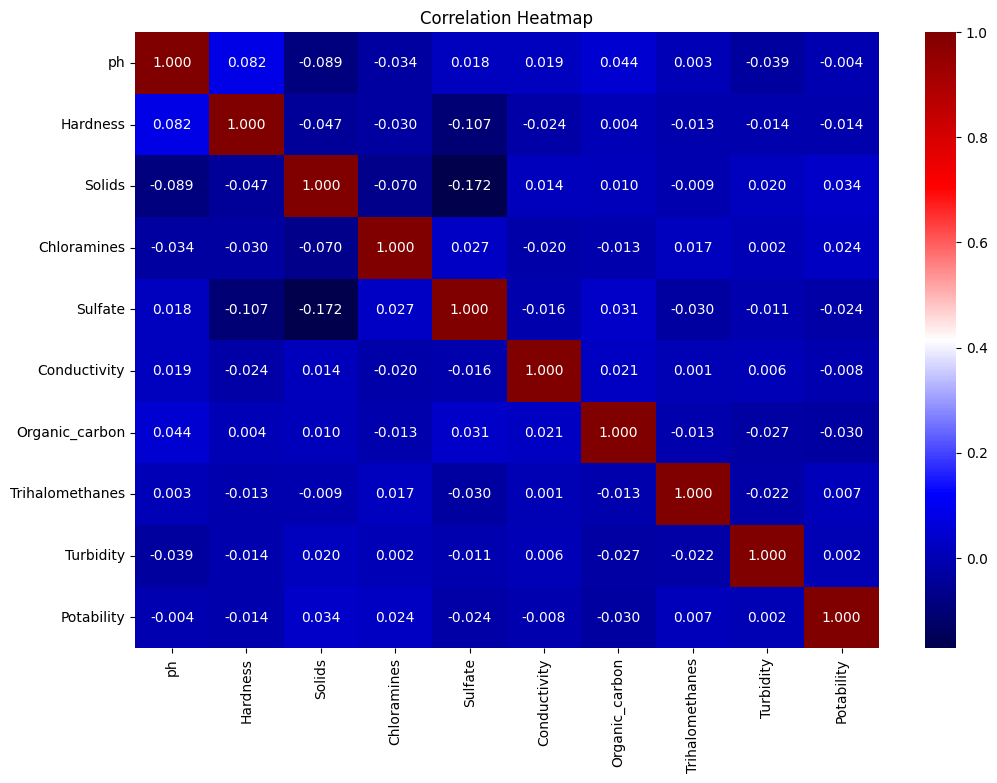

In [50]:
# Menampilkan korelasi antar fitur dengan heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='seismic', fmt='.3f')
plt.title('Correlation Heatmap')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [51]:
# Menangani data kosong yaitu, menggantinya dengan median (untuk tahap automate)
imputer = SimpleImputer(strategy='median')

In [52]:
# Memisahkan fitur dan target
X = df.drop('Potability', axis=1)
y = df['Potability']

In [53]:
# Menyimpan fitur
feauture = X.columns

In [54]:
# Melalukan imputasi pada fitur
X_imputed = imputer.fit_transform(X)

In [55]:
# Melakukan standarisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

In [56]:
# Mengembalikan DataFrame untuk fitur
X_df = pd.DataFrame(X_scaled, columns=feauture)

In [57]:
# Penggabungan target dan fitur yang sudah dilakukan imputasi dsb
final_df = pd.concat([X_df, y], axis=1)

In [58]:
final_df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,-0.025474,0.259195,-0.139471,0.112415,0.965957,1.708954,-1.180651,1.305434,-1.286298,0
1,-2.284717,-2.036414,-0.385987,-0.307694,-0.014799,2.062575,0.270597,-0.639186,0.684218,0
2,0.697319,0.847665,-0.240047,1.360594,-0.014799,-0.094032,0.781117,0.000800,-1.167365,0
3,0.845393,0.547651,0.000493,0.592008,0.644130,-0.778830,1.255134,2.152154,0.848412,0
4,1.372982,-0.464429,-0.460249,-0.363698,-0.649522,-0.343939,-0.824357,-2.182297,0.138786,0


In [59]:
# Simpan data dalam format csv
final_df.to_csv('water_potability_preprocessing.csv', index=False)